## Notebook for examining ensemble models individually

In [1]:
from analyze.analyze import AggregateCheckpoints
from models.models import model_setup_DER, model_setup_DE
from data.data import DataPreparation
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
import seaborn as sns
from sklearn.neighbors import NearestNeighbors    

In [2]:
new_title_lookup = {'predictive': 'output uncertainty injection', 'feature': 'input uncertainty injection'}
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = AggregateCheckpoints()

In [24]:
uniform = True
just_loss = False

BETA = 0.5

prescription = "linear_homoskedastic"
dim_list = ["0D", "0D", "0D", "0D",
            "2D", "2D", "2D", "2D",
            "0D", "0D", "0D", "0D",
            "2D", "2D", "2D", "2D",
            "0D", "0D", "0D", "0D",
            "2D", "2D", "2D", "2D"]
inject_type_list = ["predictive", "predictive", "feature", "feature",
                    "predictive", "predictive", "feature", "feature",
                    "predictive", "predictive", "feature", "feature",
                    "predictive", "predictive", "feature", "feature",
                    "predictive", "predictive", "feature", "feature",
                    "predictive", "predictive", "feature", "feature"]
noise_list = ["low", "low", "low", "low",
              "low", "low", "low", "low",
              "medium", "medium", "medium", "medium",
              "medium", "medium", "medium", "medium",
              "high", "high", "high", "high",
              "high", "high", "high", "high"]
              
              
model_list = ["DE", "DER", "DE", "DER",
              "DE", "DER", "DE", "DER",
              "DE", "DER", "DE", "DER",
              "DE", "DER", "DE", "DER",
              "DE", "DER", "DE", "DER",
              "DE", "DER", "DE", "DER"]
'''
m_list = [0, 0, 0, 0,
          0, 0, 0, 0,
          0, 0, 0, 0,
          0, 0, 0, 0,
          0, 0, 0, 0,
          0, 0, 0, 0]
'''


dim_list = ["2D"]
inject_type_list = ["predictive"]
noise_list = ["low"]
model_list = ["DE"]
n_models = 15


assert len(dim_list) == len(inject_type_list) == len(noise_list) == len(model_list), "lengths are not the same"
    
epoch = 99

preparing test set
2D data sim
predictive 2D DE low 0
setting up DE
final chk loaded
all values in y_pred are okay
[0.00017305 0.00014923 0.00014883 ... 0.00028926 0.00032804 0.00037083]


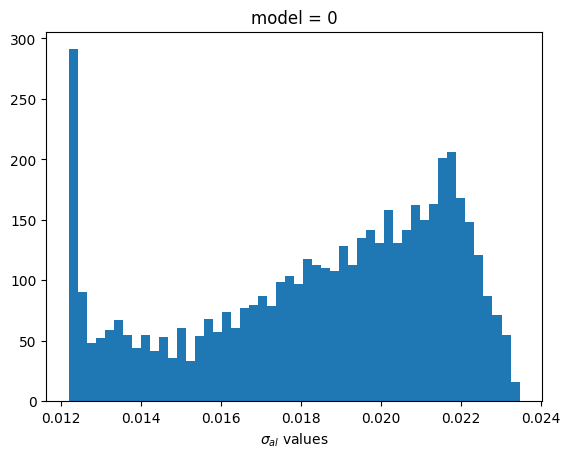

predictive 2D DE low 1
setting up DE
final chk loaded
all values in y_pred are okay
[0.00524136 0.00387674 0.0039722  ... 0.011528   0.01166355 0.01225246]


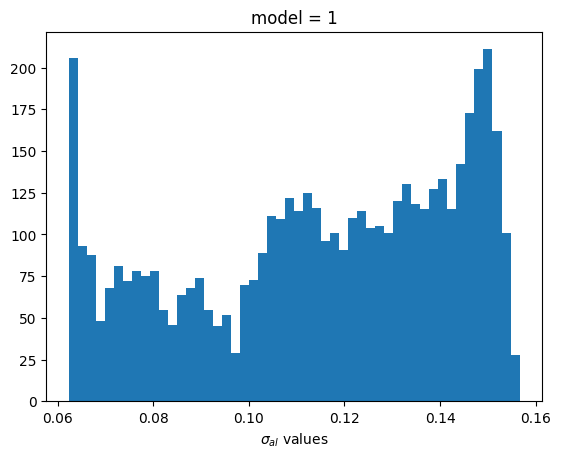

predictive 2D DE low 2
setting up DE
final chk loaded
All values in y_pred[:,1] are the same.
[0.3301223 0.3301223 0.3301223 ... 0.3301223 0.3301223 0.3301223]
predictive 2D DE low 3
setting up DE
final chk loaded
all values in y_pred are okay
[0.00016665 0.00016868 0.00015965 ... 0.00012883 0.00012819 0.00027747]


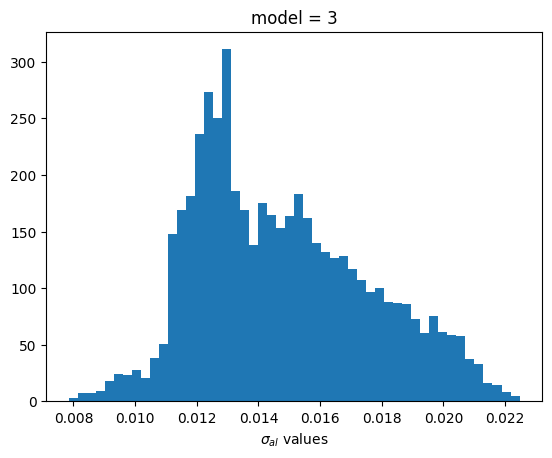

predictive 2D DE low 4
setting up DE
final chk loaded
all values in y_pred are okay
[0.00161655 0.00149255 0.00149396 ... 0.00543063 0.0070485  0.00603872]


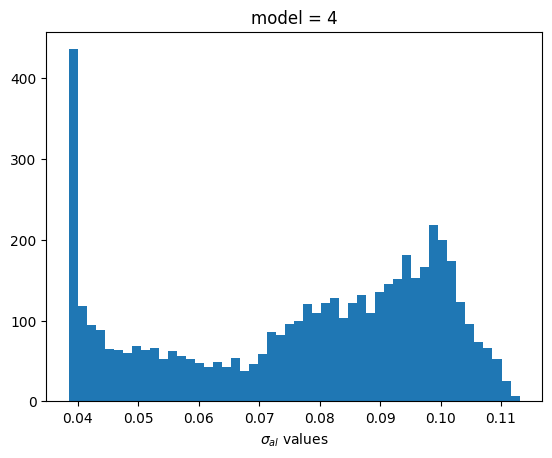

predictive 2D DE low 5
setting up DE
final chk loaded
all values in y_pred are okay
[0.00023114 0.00024852 0.00023617 ... 0.00023803 0.00030554 0.00036853]


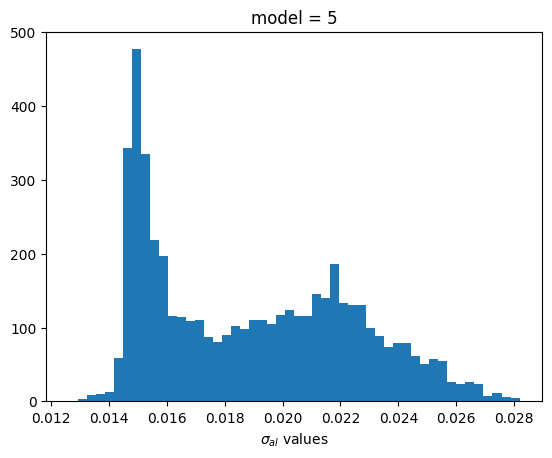

predictive 2D DE low 6
setting up DE
final chk loaded
all values in y_pred are okay
[0.00035822 0.00063194 0.00062987 ... 0.00037234 0.00036554 0.00054077]


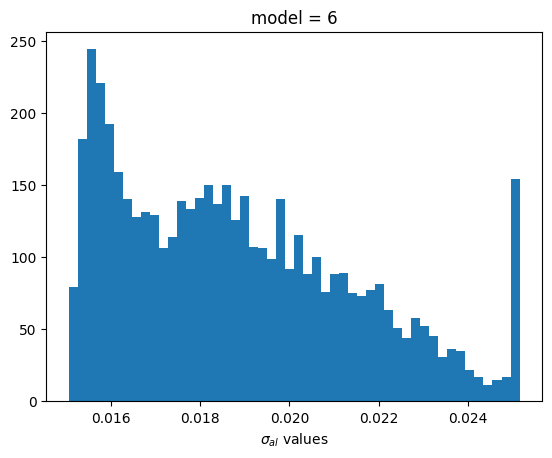

predictive 2D DE low 7
setting up DE
final chk loaded
all values in y_pred are okay
[0.00112894 0.00092363 0.00093921 ... 0.00183965 0.00200017 0.00245226]


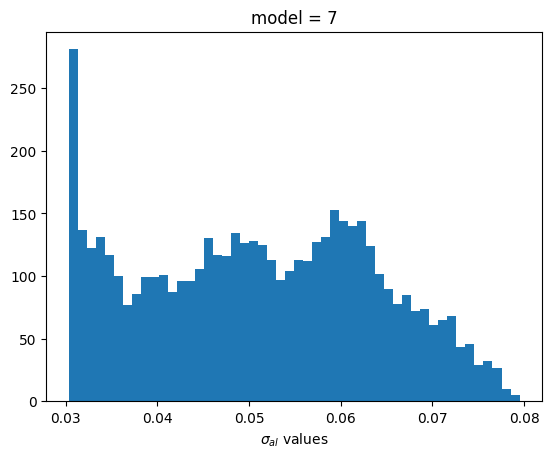

predictive 2D DE low 8
setting up DE
final chk loaded
all values in y_pred are okay
[0.00020307 0.00015631 0.00015288 ... 0.00028028 0.0002185  0.00046353]


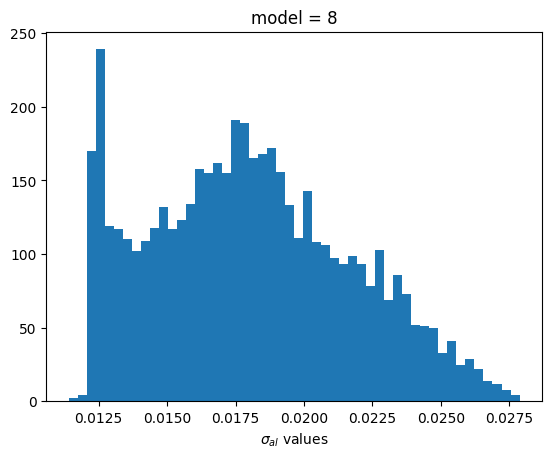

predictive 2D DE low 9
setting up DE
final chk loaded
all values in y_pred are okay
[0.00023883 0.00010369 0.00011396 ... 0.00029035 0.00028697 0.00055914]


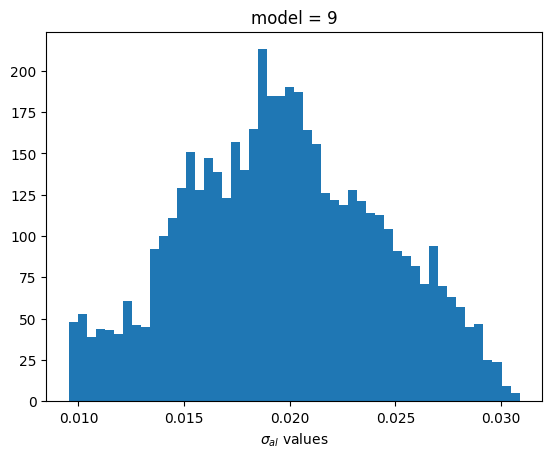

predictive 2D DE low 10
setting up DE
final chk loaded
all values in y_pred are okay
[0.00195289 0.00096811 0.00110036 ... 0.00228948 0.00240652 0.0024311 ]


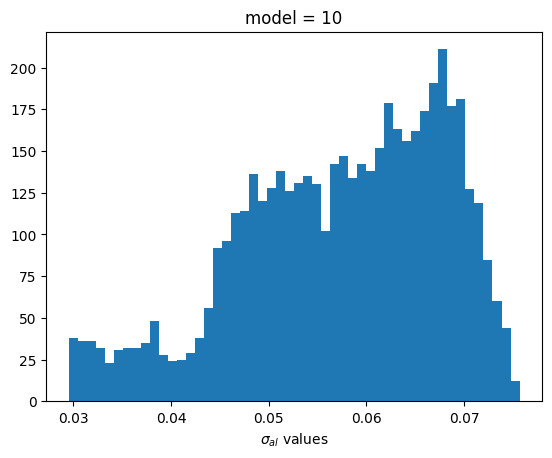

predictive 2D DE low 11
setting up DE
final chk loaded
all values in y_pred are okay
[0.00028218 0.00037066 0.0003498  ... 0.00045886 0.00077157 0.00054895]


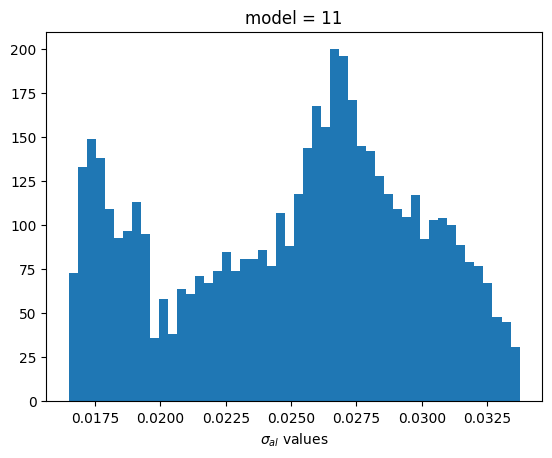

predictive 2D DE low 12
setting up DE
final chk loaded
all values in y_pred are okay
[0.00022871 0.0002321  0.0002102  ... 0.00023534 0.00022764 0.00037458]


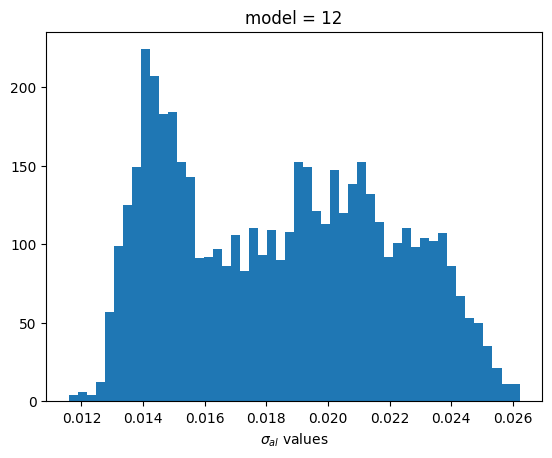

predictive 2D DE low 13
setting up DE
final chk loaded
all values in y_pred are okay
[0.00030634 0.00032239 0.00031388 ... 0.00040583 0.00041415 0.00044381]


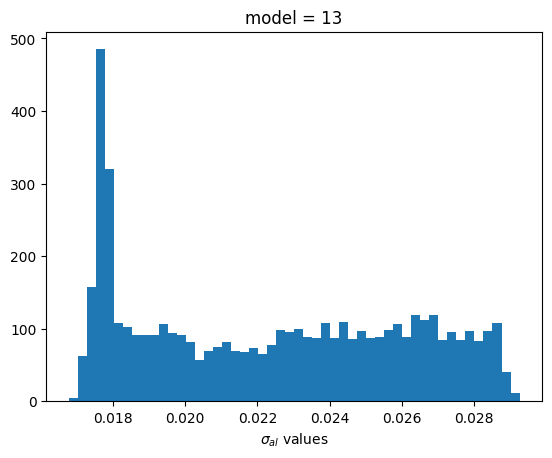

predictive 2D DE low 14
setting up DE
final chk loaded
all values in y_pred are okay
[0.00011191 0.00010599 0.00011441 ... 0.00021353 0.00019441 0.00019818]


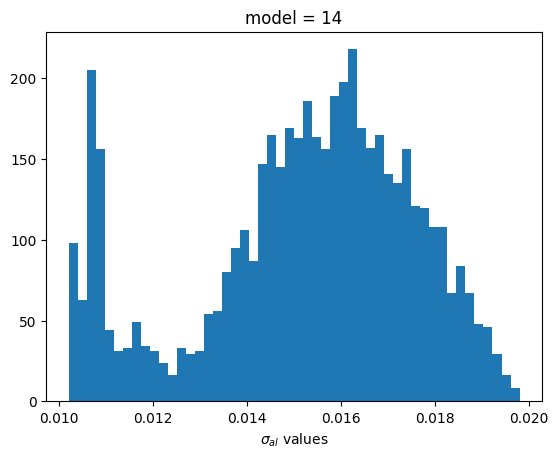

In [25]:
sig_list = []
all_sig_list = []
for d in range(len(dim_list)):
    index = d # + 1
    dim = dim_list[index]
    inject_type = inject_type_list[index]
    noise = noise_list[index]
    model = model_list[index]
    '''
    if inject_type == "predictive" and model == "DE" and noise == "low" and dim == "2D":
        m = 3
    else:
        m = 0
    '''
    
    #m = m_list[i]
    if dim == "0D":
        if uniform:
            size_df = 10000
        else:
            size_df = 1000
    elif dim == "2D":
        if uniform:
            size_df = 175000
        else:
            size_df = 5000
    print('preparing test set')
    data = DataPreparation()
    if dim == "0D":
        print('0D data sim')
        data.sample_params_from_prior(size_df)
        if inject_type == "feature":
            data.simulate_data(
                data.params,
                noise,
                "linear_homoskedastic",
                x=np.linspace(0, 10, 100),
                inject_type=inject_type,
                seed=41,
                vary_sigma=True,
            )
        elif inject_type == "predictive":
            sigma = DataPreparation.get_sigma(
                        noise, inject_type=inject_type, data_dimension=dim)
            data.simulate_data(
                data.params,
                sigma,
                "linear_homoskedastic",
                x=np.linspace(0, 10, 100),
                inject_type=inject_type,
                seed=41,
            )
        df_array = data.get_dict()
        # Convert non-tensor entries to tensors
        df = {}
        for key, value in df_array.items():
    
            if isinstance(value, TensorDataset):
                # Keep tensors as they are
                df[key] = value
            else:
                # Convert lists to tensors
                df[key] = torch.tensor(value)
        len_df = len(df["params"][:, 0].numpy())
        len_x = np.shape(df["output"])[1]
        ms_array = np.repeat(df["params"][:, 0].numpy(), len_x)
        bs_array = np.repeat(df["params"][:, 1].numpy(), len_x)
        xs_array = np.reshape(df["inputs"].numpy(), (len_df * len_x))
        ys_array = np.reshape(df["output"].numpy(), (len_df * len_x))
    
        inputs = np.array([xs_array, ms_array, bs_array]).T
        model_inputs = inputs
        model_outputs = ys_array
        '''
        print(np.shape(model_inputs))
        plt.clf()
        plt.scatter(model_inputs[:,1], model_outputs)
        plt.show()
        '''
    elif dim == "2D":
        print('2D data sim')
        sigma = DataPreparation.get_sigma(
                        noise, inject_type=inject_type, data_dimension=dim)
        data.sample_params_from_prior(
            size_df,
            low=[0, 1, -1.5],
            high=[0.01, 10, 1.5],
            n_params=3,
            seed=41)
        model_inputs, model_outputs = data.simulate_data_2d(
            size_df,
            data.params,
            sigma=sigma,
            image_size=32,
            inject_type=inject_type,
            rs=41)
    if uniform:
        # then we'll need to do the uniform thing
        model_inputs, model_outputs = DataPreparation.select_uniform(
            model_inputs, model_outputs, dim, verbose=False, rs=40
        )
    x_test = model_inputs
    y_test = model_outputs
    path = "../DeepUQResources/checkpoints/"
    for m in range(n_models):
        print(inject_type, dim, model, noise, m)
        if model == "DER":
            print('setting up DER')
            setupmodel, lossFn = model_setup_DER(
                model, DEVICE, n_hidden=64, data_type=dim)
            loss = "DER"
            COEFF = 0.01
            file_name = (
                str(path)
                + f"{model}_{prescription}_{inject_type}_{dim}"
                + f"_noise_{noise}_loss_{loss}_COEFF_{COEFF}_epoch_{epoch}"
            )
            file_name += f"_sizedf_{size_df}"
            file_name += ".pt"
            try:
                chk = torch.load(file_name, map_location=DEVICE)
            except FileNotFoundError:
                print('no file found')
                continue
            print('final chk loaded')
        elif model == "DE":
            print('setting up DE')
            loss = "bnll_loss"
            setupmodel, lossFn = model_setup_DE(
                                loss, DEVICE, n_hidden=64, data_type=dim)
            BETA = 0.5
            file_name = (
                str(path) +
                f"{model}_{prescription}_{inject_type}_{dim}"
                f"_noise_{noise}_beta_{BETA}_nmodel_{m}_epoch_{epoch}"
            )
            file_name += f"_sizedf_{size_df}"
            file_name += ".pt"
            try:
                chk = torch.load(file_name, map_location=DEVICE)
            except FileNotFoundError:
                continue
            print('final chk loaded')
        # define the model at this epoch
        setupmodel.load_state_dict(chk.get("model_state_dict"))
        # checkpoint['model_state_dict'])
        setupmodel.eval()
    
        
        y_pred = setupmodel(
            torch.Tensor(x_test
                )
            ).detach().numpy()

        if np.all(y_pred[:, 1] == y_pred[0, 1]):
            # All values are the same
            print("All values in y_pred[:,1] are the same.")
            print(y_pred[:, 1])
            continue
        else:
            print('all values in y_pred are okay')
            print(y_pred[:, 1])

        plt.clf()
    
        # Also make a histogram plot of the uncertainties to see how they are distributed. Also examine if there's a trend with true or predicted value.
        if model == "DE":
            sig = np.sqrt(y_pred[:,1])
        elif model == "DER":
            gamma, nu, alpha, beta = y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], y_pred[:, 3]
            sig = np.sqrt(beta * (1 + nu) / (alpha * nu))
        
        plt.hist(sig, bins = 50)
        plt.xlabel(r'$\sigma_{al}$ values')
        plt.title(f'model = {m}')
        plt.show()
        #plt.savefig(f'../../../Desktop/model_validation/hist_validation_u_al_{model}_{noise}_{inject_type}_{dim}_{size_df}.png', dpi=1000)

        sig_list.append(np.mean(sig))
        all_sig_list.append(sig)
        continue
        if dim == "2D":
            # Create a figure with 5 subplots in a horizontal row
            fig, axes = plt.subplots(2, 5, figsize=(20, 8)) # Adjust the figsize as needed
            
            # Loop through each subplot
            for i in range(10):
                ax = axes.flat[i]
                ax.imshow(x_test[i, :, :], aspect='auto')
                mu = round(y_pred[i,0], 3)
                if model == "DE":
                    sig = round(np.sqrt(y_pred[i,1]), 3)
                elif model == "DER":
                    gamma, nu, alpha, beta = y_pred[i, 0], y_pred[i, 1], y_pred[i, 2], y_pred[i, 3]
                    sig = round(np.sqrt(beta * (1 + nu) / (alpha * nu)),2)
                ax.set_title('true = '+str(round(y_test[i],3))
                             +', pred = '+str(mu)+' +/- '+str(sig))
                ax.figure.colorbar(ax.images[0], ax=ax, fraction = 0.046)
                ax.set_aspect('equal')
                ax.axis('off')
            
            # Show the complete figure
            plt.tight_layout()
        elif dim == "0D":
            plt.scatter(
                    y_test,
                    y_pred[:, 0],
                    #color=color_list[i],
                    #label=r"$\sigma = $" + str(sigma_list[i]),
                    s=3,
                )
            plt.xlabel('true value')
            plt.ylabel('predicted value')
        plt.show()
        

In [26]:
print(len(sig_list), sig_list)
print('mean of sig_list', np.mean(sig_list))
print('std of sig_list', np.std(sig_list))

14 [0.018492725, 0.115079135, 0.014773679, 0.07711817, 0.018910857, 0.018832864, 0.051006094, 0.018019402, 0.019715026, 0.057400465, 0.025116507, 0.018484209, 0.022373447, 0.015231928]
mean of sig_list 0.035039607
std of sig_list 0.028771296


0.035039607 0.030778533
(14, 5000)


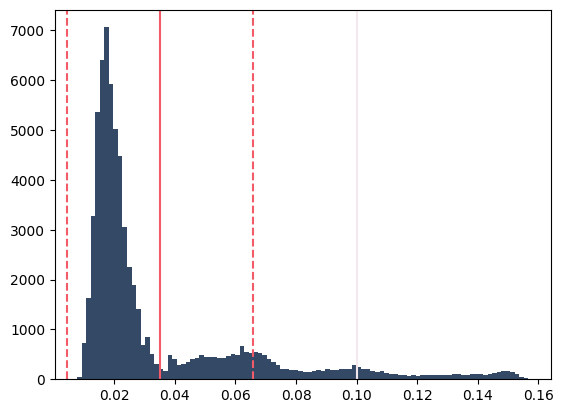

In [27]:
print(np.mean(all_sig_list), np.std(all_sig_list))
print(np.shape(all_sig_list))
plt.hist(np.array(all_sig_list).flatten(), bins=100, color='#344966')
plt.axvline(x=0.01, color='#F3E8EE')
plt.axvline(x=np.mean(np.array(all_sig_list).flatten()), color='#F45B69')
plt.axvline(x=np.mean(np.array(all_sig_list).flatten()) - np.std(np.array(all_sig_list).flatten()), color='#F45B69', ls='--')
plt.axvline(x=np.mean(np.array(all_sig_list).flatten()) + np.std(np.array(all_sig_list).flatten()), color='#F45B69', ls='--')

plt.show()